In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from scipy import special


font = {'color':  'blue',
        'weight': 'normal',
        'size': 20,
        }

In [2]:
from scipy import integrate

def module(z):
    mod = np.sqrt(z*np.conjugate(z))
    return mod

def conj(z):
    con = np.conjugate(z)
    return con

### Units: 
#### $c = \hbar = 1$ and $M_{PL}$

In [3]:
#Global constants
c = 1.0 #Speed of light
G = 1.0 #Gravitational constant

kappa_c = 1.0/3.0
ns = 0.9665 #Spectral scalar index
As = np.exp(3.040)/(10.0**10.0) #ln(10^10 As) = 3.040 ± 0.016
k0_Mpc = 0.05     # 0.05 Mpc^-1  
#                          mtrs            eV 

Omega_m0 = 0.2999 #CDM density today
#Omega_rad0 = 0.0001 #Radiation density today

z_eq = 3393.0
Omega_rad0 = Omega_m0/(1.0 + z_eq)
Omega_L0 = 1.0 - Omega_m0 - Omega_rad0

h = 0.7
H0_Gev = h*2.1331*10**(-42) #GeV
H0_Mpl = H0_Gev/((2.435)*10.0**(18.0)) 
H_eq = H0_Mpl*np.sqrt( (Omega_m0*(1.0+z_eq)**3.0) + (Omega_rad0*(1.0+z_eq)**4.0) + (Omega_L0) )
H_eq

9.39033914868487e-56

For successful BBN the reheating temperature has to satisfy $T_{reh} >= 4$ MeV

# M-S dynamical system.
## $u'_k = v_k $
## $v'_k = \left( -k^2 + \dfrac{z''}{z} \right) u_k$
# with $\left(\dfrac{z''}{z}\right)_{{(complex,real)}}$

In [54]:
def Omegas(H_end, e_folds):
    
 ############ Background ################
    n = 10.0
    P_end = 0.0
    rho_end = 3.0*(H_end**2.0)    #Mpl^4
    mu_val = n*H_end  # In M_pl units
    t_end = 2.0/(3.0*H_end)   #Mpl^-1
    t_osc = t_end*np.exp(3.0*e_folds/2.0)
    H_osc = ((H_end))/((t_osc/t_end))

    tau_0 = 1.0 
    tau_osc = t_osc/t_end
    
    H_end_GeV = H_end*((2.435)*10.0**(18.0)) 
    
    rho_end_GeV = (3.0*H_end_GeV**2.0)*((2.435)*10.0**(18.0))**2.0
    
    
    Lambda_end = ((3.0*H_end**2.0))**(1.0/4.0)  #Mpl
    Lambda_end_GeV = Lambda_end*((2.435)*10.0**(18.0)) 
    Lambda_osc_GeV = Lambda_end_GeV*(np.exp(-3.0*e_folds/4.0)) #GeV
    g_osc = 106.75
    T_osc_GeV = Lambda_osc_GeV*(30.0/(g_osc*np.pi**2.0))**(1.0/4.0)
    #T_osc_GeV = (np.exp(-3.0*e_folds/4.0))*(30.0*rho_end_GeV/(g_osc*np.pi**2.0))**(1.0/4.0)
    
    #print ('T_osc_Gev:', T_osc_GeV)
    #T_cmb = 0.23 #eV 
    #T_cmb_GeV = T_cmb*(10.0**-9.0)
    #g_cmb = 3.36
    #z_cmb = 1100.0
    #a_cmb = 1.0/(1.0+z_cmb) 
    
    g_eq = 3.36
    a_eq = 1.0/(1.0 + z_eq)
    T0 = 2.725*(8.62173*10.0**(-5.0))  #eV
    T_eq = 2.79*h*h*Omega_m0*T0*10.0**4.0 #eV
    T_eq_GeV = T_eq*(10.0**-9.0)
    
    
    #a_end = a_eq*((H_end/H_osc)**(-2.0/3.0))*((H_osc/H_eq)**(-1.0/2.0))
    #a_end = 10.**-10.
    #a_osc = a_end*np.exp(e_folds)
    a_osc = a_eq*(T_eq_GeV/T_osc_GeV)*(g_osc/g_eq)**(-1.0/4.0)
    a_end = a_osc*np.exp(-e_folds)
    #print (a_end, a_osc)
    
    #a_osc = a_cmb*(T_cmb_GeV/T_osc_GeV)*(g_osc/g_cmb)**(-1./4.0)
    
    JJ = 1000 #t_array size
 
    tau_array = np.zeros(JJ)
    tau_array[0] = 1.0
    tau_array[-1] = t_osc/t_end
    
    qq = 0
    while tau_array[qq] < tau_array[-1]:
        tau_array[qq+1] = tau_array[qq]*1.1
        qq = qq + 1
    tau_array = tau_array[tau_array>0]
    t_array = tau_array*t_end
   
    
    loga_analytic = 2.0*np.log(t_array/t_end)/3.0
    a_analytic = a_end*np.exp(loga_analytic)
    eta_array = integrate.cumtrapz(1.0/a_analytic, t_array)
    eta_end = eta_array[0]
    eta_osc = eta_array[-1]
    
    Csqrt = (a_end**(3./2.))*np.sqrt((H_end**2.0) - (P_end*kappa_c))
    numer_complex = Csqrt
    denom_complex = np.sqrt(2.0*kappa_c)*mu_val*np.exp(1j*((mu_val*t_end)))
    C1 = numer_complex/denom_complex 
    phi_end = (C1*(a_end**(-3./2.))*np.exp(1j*((mu_val*t_end))))
        
    #Creating the k-modes
    k_end = a_end*H_end #M_pl^-1
    k_min = a_osc*H_osc
    
    zbi_osc = - ((mu_val*a_osc)**2.0)*(1.0 - (3.0*1j*H_osc/(mu_val))) + (((H_osc*a_osc)**2.0)/2.0)
    kJ_osc = np.sqrt(module(zbi_osc)).real
    
    k_max = kJ_osc
    LL = 2000 #k_array size
 
    k2_arr = np.zeros(LL)
    k2_arr[0] = (k_min.real**2.0)
    k2_arr[-1] = (k_max.real**2.0)
    
    vv = 0
    while k2_arr[vv] < (k_max.real)**2.0:
        k2_arr[vv+1] = k2_arr[vv]*1.15
        vv = vv + 1
    
    
    k2_arr = k2_arr[k2_arr>0]
    #k2_arr = np.linspace(k_min**2.0, k_max**2.0, 100)
    k_arr = np.sqrt(k2_arr)
    
        
    #print ('k_min:', k_min)
    #print ('k_max:', k_max)
    #print ('Number of scales:', len(k_arr))
    #print ('H_end:', H_end)
    #print ('e-folds:', e_folds)
    
    a_modes = []
    zeta_modes = []
    delta_k = []
    
    nu_phi =  2.0 - ns/2.0   #observational
    l=0
    
    M_arr2 = 4.0*np.pi*(k_end**3.0)/(H_end*k_arr**3.0) #Mpl,  Mass of each scale
    M_arr = M_arr2#[M_arr2>1.0]  #Reducing Planck scales  
    #k_arr = k_arr[M_arr2>1.0]    
    R_arr = 1.0/k_arr #Mpl^{-1}
    
    #print ('Number of scales reduced:', len(k_arr))
    
    
    def MS_eq(tau,y): #y is array of the system variables

        xk = y[0]
        yk = y[1]
    
        t_conf = t_end*((a_end*eta_end*(tau-1.0)/(3.0*t_end)) + 1.0 )**3.0
        a = a_end*(t_conf/t_end)**(2.0/3.0)
        #phi_C = (C1*(a_end**(-3./2.))*np.exp(1j*((mu_val*t_conf))))*t_end/t_conf
        phi_C = (C1*((a)**(-3./2.))*np.exp(1j*((mu_val*t_conf))))
        Pi_C = (1j*mu_val*phi_C) - (phi_C/t_conf)
        Pic_C = a*Pi_C
             
        H = ((H_end))/((t_conf/t_end))
        HC2_conformal = kappa_c*((Pic_C*np.conjugate(Pic_C)) + ((phi_C*np.conjugate(phi_C)*(mu_val*a)**2)))
        
        k_J2 = ((-(a*mu_val)**2.0)*(1.0 + (3.0*np.sqrt(HC2_conformal)*phi_C/Pic_C))) + ((HC2_conformal)/2.0)    
        k_eff = (k2_arr[l] - np.conjugate(k_J2))
        #### SYSTEM EQUATION ####

        dxdtau = vk_end*yk*eta_end/uk_end
    
        dydtau = -xk*k_eff*(uk_end*eta_end/vk_end)
    
        return np.array([dxdtau, dydtau])     #Output of (phi, Pi)

          
    while l < (len(k_arr)):

        if k_arr[l] >= k_end:
            
            uk_end = np.exp(-1j*k_arr[l]*eta_end)/np.sqrt(2.0*k_arr[l])
            vk_end = -1j*k_arr[l]*uk_end 
        #    print ("Small scales", l)
           
        else:
            uk_end = a_end*(np.exp(-1j*k_arr[l]*eta_end))*H_end*((k_arr[l]/(a_end*H_end))**((3.0/2.0) - nu_phi))/np.sqrt(2.0*k_arr[l]**3.0)
            vk_end = a_end*H_end*uk_end*( (5.0/2.0) + nu_phi - (2.0*1j*k_arr[l]/(a_end*H_end)) )/2.0
        #    print ("Large scales", l)
            

        #### RUNGE-KUTTA ####
        vi = np.array([1.0 + 1j*0, 1.0 + 1j*0])
        tau_span = np.array([1.0, eta_osc/eta_end])
        sol = integrate.solve_ivp(MS_eq, tau_span, vi, method='RK45')#, t_eval = a)
    
        tau_arr = sol.t
        uk_arr = sol.y[0]*uk_end
        vk_arr = sol.y[1]*vk_end
        
        t_conf = t_end*((a_end*eta_end*(tau_arr-1.0)/(3.0*t_end)) + 1.0 )**3.0
        a_arr = a_end*(t_conf/t_end)**(2.0/3.0)
        #phi_C = (C1*(a_end**(-3./2.))*np.exp(1j*((mu_val*t_conf))))*t_end/t_conf
        phi_C = (C1*((a_arr)**(-3./2.))*np.exp(1j*((mu_val*t_conf))))
        Pi_C = (1j*mu_val*phi_C) - (phi_C/t_conf)
        Pic_C = a_arr*Pi_C
             
        HC2_arr = kappa_c*((Pic_C*np.conjugate(Pic_C)) + ((phi_C*np.conjugate(phi_C)*(mu_val*a_arr)**2)))
        
        z_arr = a_arr*Pic_C/np.sqrt(HC2_arr)
        
        a = np.array(a_arr)
        u_modes = np.array(uk_arr)
        z_modes = np.array(z_arr)
        H2_conf = np.array(HC2_arr)
        
        a_modes.append(a)
        zeta_modes.append(u_modes/z_modes)
        
        
        delta_k.append(-2.0*zeta_modes[l]*((k2_arr[l]/H2_conf) + 3.0)/5.0) #Super-horizon \Phi = const.
        
        
        l = l + 1
        
    #### Power spectra ####
    
    Pdelta = np.zeros((len(k_arr), len(tau_arr)))
    Pzeta = np.zeros((len(k_arr), len(tau_arr)))
    #Pzeta = np.zeros((len(k_arr), (np.shape(delta_k))[1]))

    for kk in range(len(k_arr)):
        time = -1 # t_osc
        Pdelta[kk,time] = ((k_arr[kk]**3.0)*(module(delta_k[kk][time])**2.0)/(2.0*np.pi)).real
        Pzeta[kk,time] = ((k_arr[kk]**3.0)*(module(zeta_modes[kk][time])**2.0)/(2.0*np.pi)).real
    Pdelta_osc = Pdelta[:,-1]
    Pzeta_osc = Pzeta[:,-1]
        
    efolds_bc = -2.0*np.log(k_arr/k_end) 
    N_bc = efolds_bc[efolds_bc>0]
    
    
    #### Variance \sigma^2 ####
    
    sigma2_osc = []

    for jj in range(len(R_arr)):
        sigma2_osc.append(integrate.simps(Pdelta_osc.real*(np.exp(-(k_arr*R_arr[jj])**2.0))/k_arr , k_arr))
    
    sigma2_osc = np.sqrt((np.array(sigma2_osc))**2.0)
    
    #### Computing \beta ####
    
    delta_crit = 1.68
    P_erfc = special.erfc(delta_crit/(np.sqrt(2.0*sigma2_osc)))  
    
    P_erfc = np.array(P_erfc)
    dr_dm = R_arr/(3.0*M_arr)
    dP_dr = np.diff(P_erfc)/np.diff(R_arr)
    beta = -M_arr[0:-1]*dr_dm[0:-1]*dP_dr
    #dlnsigma_dlnM = np.diff(np.log(sigma2_osc))/np.diff(np.log(M_arr)) 
    #beta = -delta_crit*dlnsigma_dlnM*np.exp((-delta_crit**2.0)/(2.0*sigma2_osc[0:-1]))/(np.sqrt(2.0*np.pi)*sigma2_osc[0:-1])
    
    Omega_PBH = []
    Omega_relic = []
    Omega_PBH_normal = []
    
    M_PBH_arr = []
    
    M_PBH_normal = []
    beta_PBH = []
    
    for rr in range(len(M_arr)-1):
        rr = rr + 1
        #### Renormalising the mass fraction at the end of the instability ####
        #integral_PBH = -1.0*integrate.simps(beta[0:rr]/M_arr[0:rr], M_arr[0:rr])

        integral_PBH = -1.0*integrate.simps(beta[0:rr], np.log(M_arr[0:rr]))
        integral_relic = -1.0*integrate.simps(beta[0:rr]/(M_arr[0:rr]), np.log(M_arr[0:rr]))
        if integral_PBH <= 1.0:
            Omega_PBH.append(integral_PBH)
            Omega_relic.append(integral_relic)
            M_PBH_arr.append(M_arr[rr])
            beta_PBH.append(beta[rr-1]) 
            #else: 
             #   continue
    
    for ee in range(len(M_arr)-1):
        ee = ee + 1
        #### Renormalising the mass fraction at the end of the instability ####
        integral_PBH2 = -1.0*integrate.simps(beta[0:ee]/(M_arr[0:ee]),(M_arr[0:ee]))
        Omega_PBH_normal.append(integral_PBH2)
        M_PBH_normal.append(M_arr[ee])
    
    Omega_PBH = np.array(Omega_PBH)
    Omega_PBH_normal = np.array(Omega_PBH_normal)
    Omega_relic = np.array(Omega_relic)
    
    beta_PBH = np.array(beta_PBH)
    M_PBH_arr = np.array(M_PBH_arr)
    M_PBH_normal = np.array(M_PBH_normal)
    
    for zz in range(len(M_PBH_arr)):
        if Omega_PBH[zz] > 0.001*Omega_PBH.max() :
            M_intervalo = M_PBH_arr[zz]
            break   
           
    if Omega_PBH[0] <= 0:
    #    print ('Omega_PBH is null')
    #    print ('Omega_relic is null')
        Omega_PBH_osc = 0.0
        Omega_relic_osc = 0.0
        M_PBH_osc = 0.0
        M_intervalo = 0.0

    else:
        Omega_PBH_osc = Omega_PBH.max()
        Omega_relic_osc = Omega_relic.max()
        M_PBH_osc = M_PBH_arr.max()
   #     print ('Omega_PBH(t_osc):', Omega_PBH_osc)
   #     print ('Omega_relic(t_osc):', Omega_relic_osc)
        
    #print ('-------------------------------------------------')
    
     
    intervalo_eva = (M_intervalo)**3.0   # t_eva - t_osc
    
     
    JJ = 10000 #t_relic size    
    tau_relic = np.zeros(JJ)
    tau_relic[0] = 1.0
    tau_relic[-1] = (intervalo_eva + t_osc)/t_osc
    aa = 0
    while tau_relic[aa] <= tau_relic[-1]:
        tau_relic[aa+1] = tau_relic[aa]*1.01
        aa = aa + 1
    
    a_eva = a_osc*tau_relic[-1]**(1./2.)
    z_eva = (1.0/a_eva) - 1.0
    
    b_got = (tau_relic)**(1./2.0)
    if Omega_PBH_osc <= 0.5:
        for xx in range(len(b_got)): 
            Omega_PBH_eva = b_got[xx]*Omega_PBH_osc
            if Omega_PBH_eva > 1.0:
                Omega_PBH_eva = b_got[xx-1]*Omega_PBH_osc
                break
    if Omega_PBH_osc <= 0.5:        
        for xx in range(len(b_got)):
            Omega_relic_eva = b_got[xx]*Omega_relic_osc
            if Omega_relic_eva > 1.0:
                Omega_relic_eva = b_got[xx-1]*Omega_relic_osc
                break
            
    if Omega_PBH_osc > 0.5:
        Omega_PBH_eva = Omega_PBH_osc
        Omega_relic_eva = Omega_relic_osc
         
    #Omega_m_eva = Omega_m0/(3.0*(Omega_m0 + (Omega_rad0*(1+z_eva)))  #Omega_matter at evaporation time
    up_term = Omega_m0*(1.0+z_eva)**3.0
    down_term = 3.0*( (Omega_m0*(1.0+z_eva)**3.0) + (Omega_rad0*(1.0+z_eva)**4.0) + (Omega_L0))
    Omega_m_eva = up_term/down_term
    
    #Omega_m_eva = Omega_m0
    
    Omega_PBH_analytic = -special.erfc(delta_crit/(np.sqrt(2.0*sigma2_osc[0]))) + special.erfc(delta_crit/(np.sqrt(2.0*sigma2_osc)))
    
    #print ( 'Omega_PBH_osc:', Omega_PBH.max())
    #print ( 'Omega_PBH_osc_analytic:', Omega_PBH_analytic.max())
    #print ( 'Omega_relic_osc:', Omega_relic_osc)
    #print ( 'Omega_DM_eva:', Omega_m_eva)
    #print ( 'Omega_PBH_eva:', Omega_PBH_eva)
    #print ( 'Omega_relic_eva/Omega_DM_eva:', Omega_relic_eva/Omega_m_eva )
    
    
    R_PBH = Omega_PBH_eva/Omega_m_eva
    R_relic = Omega_relic_eva/Omega_m_eva
    
    return Omega_PBH_analytic, M_arr 
    #return R_relic, R_PBH,  Omega_relic_eva, Omega_PBH_eva

In [49]:
Hend = (10.0**-9.0)/np.sqrt(3.0)
efolds = 5.0

In [50]:
%%time
#R_reliquias, R_ANP, Om_relic, Om_PBH = Omegas(Hend , efolds)
Om_renor, M_renor, Om_analytic, M_array = Omegas(Hend, efolds)

Omega_PBH_osc: 4.474339699449103e-59
Omega_PBH_osc_analytic: 2.660218713538407e-59
CPU times: user 8min 12s, sys: 1.66 s, total: 8min 14s
Wall time: 8min 16s


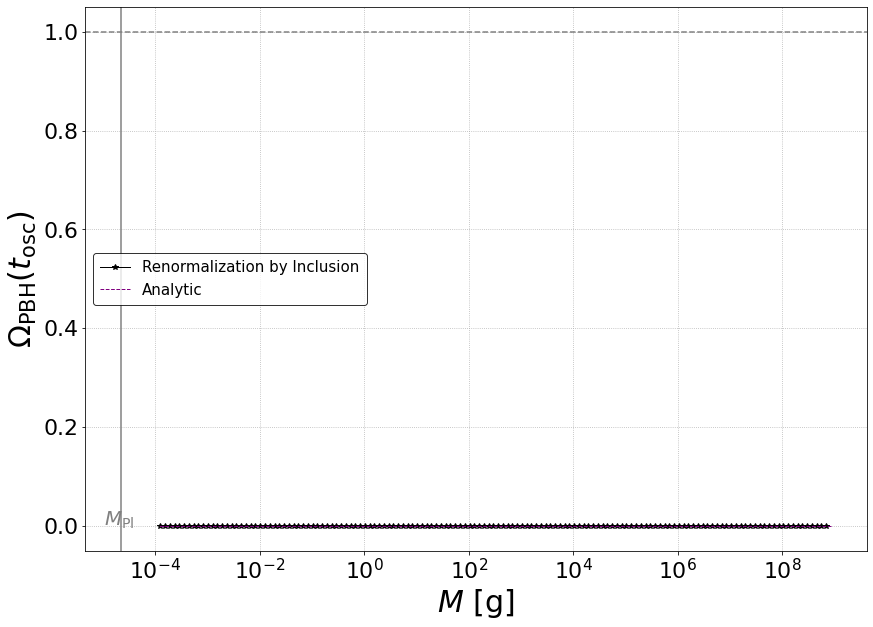

In [51]:
figure, ax = plt.subplots(1, 1,figsize = (14,10),  sharex=True)


plt.plot(1000.0*M_renor[0:-1]*2.1764*(10.0**(-8.0)), Om_renor[0:-1],  '*-', lw =1 , color='black', label= 'Renormalization by Inclusion')
#plt.plot(1000.0*M_normal*2.1764*(10.0**(-8.0)), Om_normal,  '--', lw =1 , color='purple', label ='Not renormalizaded')
plt.plot(1000.0*M_array*2.1764*(10.0**(-8.0)), Om_analytic,  '--', lw =1 , color='purple', label ='Analytic')

plt.axhline(y=1.0, color='grey', linestyle='--')
#plt.axvline(x=M_normal[17]*2.1764*(10.0**(-8.0)), color='grey', linestyle='-')

plt.xlabel(r'$M \ [\rm g]$',fontsize=30)
plt.ylabel(r'$  \Omega_{\rm PBH}(t_{\rm osc})  $',fontsize=30)
#plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

#plt.text(1000.0*0.75*1.1764*(10.0**(-8.0)),0.90 , r'$M_{\rm min}$', {'color': 'grey', 'fontsize': 20})
plt.text(1000.0*0.9*1.1764*(10.0**(-8.0)),0.0 , r'$M_{\rm Pl}$', {'color': 'grey', 'fontsize': 20})
plt.axvline(x=1000.0*2.1764*(10.0**(-8.0)), color='grey', linestyle='-')

#plt.ylim(-1/100, 1.1)
#plt.xlim((10.0**(-8.0)), 10.0**-1)
leg1 = plt.legend(loc='center left', frameon=True,  fontsize = 15, borderpad=0.5, labelspacing=0.5)
leg1.get_frame().set_edgecolor('black')

plt.grid('on', ls = 'dotted')
#plt.savefig('Renorm_Inclusion.pdf')
plt.show()

In [68]:
L = 200
H_end_array = np.zeros(L)
H_end_array[0] = 10**-8/np.sqrt(3.0)

ff = 0
while H_end_array[ff] <= 10**-1/np.sqrt(3.0):
    H_end_array[ff+1] = H_end_array[ff]*5.0
    ff = ff + 1
H_end_array = H_end_array[H_end_array>0]
#H_end_array = np.linspace(10**-2, 10**-3, 10)/np.sqrt(3.0)
e_folds_array = np.linspace(0.5,6, len(H_end_array))
len(H_end_array) ,H_end_array

(12,
 array([5.77350269e-09, 2.88675135e-08, 1.44337567e-07, 7.21687836e-07,
        3.60843918e-06, 1.80421959e-05, 9.02109796e-05, 4.51054898e-04,
        2.25527449e-03, 1.12763724e-02, 5.63818622e-02, 2.81909311e-01]))

In [69]:
Omega_norm_arrays = []
M_norm_arrays = []
Omega_arrays_H = []
M_arrays_H = []

efolds = 5.0
Hend = (10.0**-5.0)/np.sqrt(3.0)
for tt in range(len(H_end_array)):
    print (tt)
    Om_normal, M_normal = Omegas(H_end_array[tt] , efolds)
    
    Omega_arrays_H.append(Om_normal)
    M_arrays_H.append(M_normal)

0
1
2
3
4
5
6
7
8
9
10
11


In [70]:
H_end_array[0]

5.773502691896258e-09

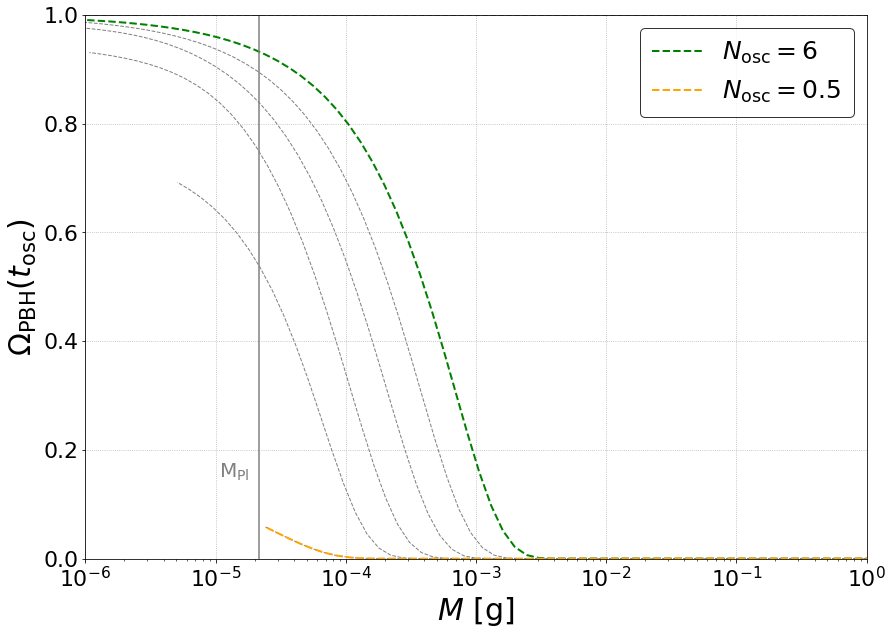

In [98]:
figure, ax = plt.subplots(1, 1,figsize = (14,10),  sharex=True)

plt.plot(1000.0*M_arrays[1][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays[1][:-1],  '--', lw =1, color = 'grey')
plt.plot(1000.0*M_arrays[2][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays[2][:-1],  '--', lw =1, color = 'grey')
plt.plot(1000.0*M_arrays[3][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays[3][:-1],  '--', lw =1, color = 'grey')
plt.plot(1000.0*M_arrays[4][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays[4][:-1],  '--', lw =1, color = 'grey')
plt.plot(1000.0*M_arrays[5][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays[5][:-1],  '--', lw =1, color = 'grey')
plt.plot(1000.0*M_arrays[6][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays[6][:-1],  '--', lw =1, color = 'grey')
plt.plot(1000.0*M_arrays[7][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays[7][:-1],  '--', lw =1, color = 'grey')
plt.plot(1000.0*M_arrays[8][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays[8][:-1],  '--', lw =1, color = 'grey')
#plt.plot(1000.0*M_arrays[9]*2.1764*(10.0**(-8.0)), Omega_arrays[9],  '--', lw =1, color = 'grey')

plt.plot(1000.0*M_arrays[11]*2.1764*(10.0**(-8.0)), Omega_arrays[11],  '--', lw =2, color = 'green',label = r'$N_{\rm osc} = 6$')
plt.plot(1000.0*M_arrays[4][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays[4][:-1],  '--', lw =2, color = 'orange', label = r'$N_{\rm osc} = 0.5$')


plt.axhline(y=1.0, color='grey', linestyle='--')
plt.axvline(x=1000.0*2.1764*(10.0**(-8.0)), color='grey', linestyle='-')

plt.xlabel(r'$M \ [\rm g]$',fontsize=30)
plt.ylabel(r'$  \Omega_{\rm PBH}(t_{\rm osc})  $',fontsize=30)
#plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.text(1000.0*0.9*1.1764*(10.0**(-8.0)),0.15, r'$\rm M_{\rm Pl}$', {'color': 'grey', 'fontsize': 20})

plt.ylim(0, 1)
plt.xlim((10.0**(-6.0)), 10.0**0)
leg1 = plt.legend(loc='upper right', frameon=True,  fontsize = 25, borderpad=0.5, labelspacing=0.5)
leg1.get_frame().set_edgecolor('black')

plt.grid('on', ls = 'dotted')
plt.savefig('Omega_pbh_vs_M_pbh_efolds.pdf')
plt.show()

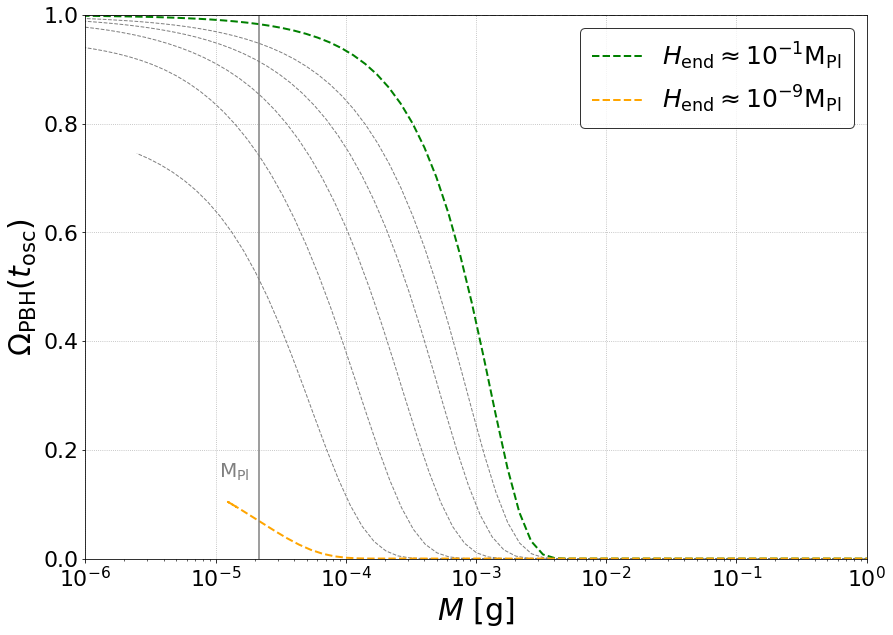

In [99]:
figure, ax = plt.subplots(1, 1,figsize = (14,10),  sharex=True)

plt.plot(1000.0*M_arrays_H[1][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays_H[1][:-1],  '--', lw =1, color = 'grey')
plt.plot(1000.0*M_arrays_H[2][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays_H[2][:-1],  '--', lw =1, color = 'grey')
plt.plot(1000.0*M_arrays_H[3]*2.1764*(10.0**(-8.0)), Omega_arrays_H[3],  '--', lw =1, color = 'grey')
plt.plot(1000.0*M_arrays_H[4][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays_H[4][:-1],  '--', lw =1, color = 'grey')
plt.plot(1000.0*M_arrays_H[5][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays_H[5][:-1],  '--', lw =1, color = 'grey')
#plt.plot(1000.0*M_arrays_H[6][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays_H[6][:-1],  '--', lw =1, color = 'grey')
#plt.plot(1000.0*M_arrays_H[7][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays_H[7][:-1],  '--', lw =1, color = 'grey')
#plt.plot(1000.0*M_arrays_H[8][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays_H[8][:-1],  '--', lw =1, color = 'grey')
#plt.plot(1000.0*M_arrays_H[9][:-1]*2.1764*(10.0**(-8.0)), Omega_arrays_H[9][:-1],  '--', lw =1, color = 'grey')

plt.plot(1000.0*M_arrays_H[8]*2.1764*(10.0**(-8.0)), Omega_arrays_H[8],  '--', lw =2, color = 'green',label = r'$H_{\rm end} \approx 10^{-1} \rm M_{\rm Pl}$')
plt.plot(1000.0*M_arrays_H[0]*2.1764*(10.0**(-8.0)), Omega_arrays_H[0],  '--', lw =2, color = 'orange', label = r'$H_{\rm end} \approx 10^{-9} \rm M_{\rm Pl}$')


plt.axhline(y=1.0, color='grey', linestyle='--')
plt.axvline(x=1000.0*2.1764*(10.0**(-8.0)), color='grey', linestyle='-')

plt.xlabel(r'$M \ [\rm g]$',fontsize=30)
plt.ylabel(r'$  \Omega_{\rm PBH}(t_{\rm osc})  $',fontsize=30)
#plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.text(1000.0*0.9*1.1764*(10.0**(-8.0)),0.15, r'$\rm M_{\rm Pl}$', {'color': 'grey', 'fontsize': 20})

plt.ylim(0, 1)
plt.xlim((10.0**(-6.0)), 10.0**0)
leg1 = plt.legend(loc='upper right', frameon=True,  fontsize = 25, borderpad=0.5, labelspacing=0.5)
leg1.get_frame().set_edgecolor('black')

plt.grid('on', ls = 'dotted')
plt.savefig('Omega_pbh_vs_M_pbh_Hend.pdf')
plt.show()

In [328]:
MM = 200 #t_relic size
 
H_end_arr = np.zeros(MM)
H_end_arr[-1] = (10.0**-4)/np.sqrt(3.0)
H_end_arr[0] = (10.0**1)/np.sqrt(3.0)

ff = 0
while H_end_arr[ff] >= H_end_arr[-1]:
    H_end_arr[ff+1] = H_end_arr[ff]/1.11
    ff = ff + 1
H_end_arr = H_end_arr[H_end_arr>0]

#H_end_arr = np.array(np.linspace(10**-2, 10**-3, 50)/np.sqrt(3.0))
e_folds_arr = np.linspace(1.0, 2.0, len(H_end_arr))
#e_folds_arr = np.array([1.0,1.5, 2.0, 2.5 ,3.0, 3.5, 4.0])

H_end_arr, e_folds_arr

(array([5.77350269e+00, 5.20135378e+00, 4.68590430e+00, 4.22153541e+00,
        3.80318505e+00, 3.42629284e+00, 3.08675031e+00, 2.78085613e+00,
        2.50527579e+00, 2.25700522e+00, 2.03333804e+00, 1.83183607e+00,
        1.65030276e+00, 1.48675925e+00, 1.33942275e+00, 1.20668716e+00,
        1.08710555e+00, 9.79374367e-01, 8.82319250e-01, 7.94882207e-01,
        7.16110096e-01, 6.45144231e-01, 5.81211019e-01, 5.23613531e-01,
        4.71723901e-01, 4.24976488e-01, 3.82861701e-01, 3.44920451e-01,
        3.10739145e-01, 2.79945176e-01, 2.52202861e-01, 2.27209785e-01,
        2.04693500e-01, 1.84408558e-01, 1.66133836e-01, 1.49670123e-01,
        1.34837949e-01, 1.21475629e-01, 1.09437504e-01, 9.85923458e-02,
        8.88219332e-02, 8.00197596e-02, 7.20898735e-02, 6.49458320e-02,
        5.85097586e-02, 5.27114942e-02, 4.74878326e-02, 4.27818312e-02,
        3.85421903e-02, 3.47226939e-02, 3.12817062e-02, 2.81817173e-02,
        2.53889345e-02, 2.28729140e-02, 2.06062288e-02, 1.856417

In [329]:
%%time
Ratio_PBH = np.zeros((len(e_folds_arr), len(H_end_arr)))
Ratio_relic = np.zeros((len(e_folds_arr), len(H_end_arr)))
Omega_relics = np.zeros((len(e_folds_arr), len(H_end_arr)))
Omega_PBHs = np.zeros((len(e_folds_arr), len(H_end_arr)))

hh=0
for ee in range(len(e_folds_arr)):
    print (e_folds_arr[ee])
    for hh in range(len(H_end_arr)):
        Ratio_relic[ee,hh], Ratio_PBH[ee,hh], Omega_relics[ee,hh], Omega_PBHs[ee,hh] = Omegas(H_end_arr[hh], e_folds_arr[ee])
        if Ratio_PBH[ee,hh] <= 0.0 and Ratio_relic[ee,hh] <= 0.0:
            break

1.0
1.0089285714285714
1.0178571428571428
1.0267857142857142
1.0357142857142858
1.0446428571428572
1.0535714285714286
1.0625
1.0714285714285714
1.0803571428571428
1.0892857142857142
1.0982142857142858
1.1071428571428572
1.1160714285714286
1.125
1.1339285714285714
1.1428571428571428
1.1517857142857142
1.1607142857142856
1.1696428571428572
1.1785714285714286
1.1875
1.1964285714285714
1.2053571428571428
1.2142857142857142
1.2232142857142856
1.2321428571428572
1.2410714285714286
1.25
1.2589285714285714
1.2678571428571428
1.2767857142857142
1.2857142857142856
1.2946428571428572
1.3035714285714286
1.3125
1.3214285714285714
1.3303571428571428
1.3392857142857142
1.3482142857142856
1.3571428571428572
1.3660714285714286
1.375
1.3839285714285714
1.3928571428571428
1.4017857142857142
1.4107142857142856
1.4196428571428572
1.4285714285714286
1.4375
1.4464285714285714
1.4553571428571428
1.4642857142857142
1.4732142857142856
1.4821428571428572
1.4910714285714286
1.5
1.5089285714285714
1.51785714285714

In [330]:
Ratio_relic

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

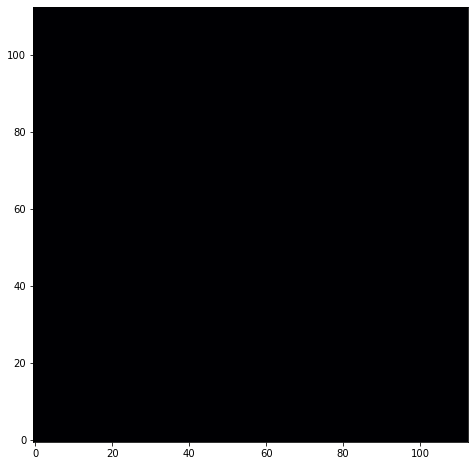

In [331]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

plt.imshow(Ratio_relic, origin='lower', cmap=plt.cm.get_cmap("inferno") )   #Muestra una rebanada del cubo

#plt.ylim(10.0**-20,10.0)
#leg1 = plt.legend(loc='upper right', frameon=True,  fontsize = 22, borderpad=0.5, labelspacing=0.5)
#leg1.get_frame().set_edgecolor('black')
#cbar.set_label(r'$\Omega_{\rm PBH}$' , fontsize=25)


#cbar = plt.colorbar()
#cbar.set_label(r'$\Omega_{\rm relic}/\Omega_{dm} \ \ $' , fontsize=25,)
    
font_size = 20 # Adjust as appropriate.
#cbar.ax.tick_params(labelsize=font_size)
plt.show()

In [332]:
rho_end_arr = 3.0*H_end_arr**2.0
rho_osc_arr = rho_end_arr*np.exp(-3.0*e_folds_arr)
rho_end_arr_GeV = rho_end_arr*((2.435)*10.0**(18.0))**4.0 
rho_osc_arr_GeV = rho_osc_arr*((2.435)*10.0**(18.0))**4.0
(rho_end_arr_GeV)**(1.0/4.0), (rho_osc_arr_GeV)**(1.0/4.0)

(array([7.70014610e+18, 7.30865524e+18, 6.93706856e+18, 6.58437409e+18,
        6.24961132e+18, 5.93186855e+18, 5.63028046e+18, 5.34402572e+18,
        5.07232474e+18, 4.81443759e+18, 4.56966193e+18, 4.33733116e+18,
        4.11681255e+18, 3.90750555e+18, 3.70884014e+18, 3.52027527e+18,
        3.34129742e+18, 3.17141916e+18, 3.01017786e+18, 2.85713438e+18,
        2.71187194e+18, 2.57399494e+18, 2.44312788e+18, 2.31891436e+18,
        2.20101610e+18, 2.08911203e+18, 1.98289739e+18, 1.88208291e+18,
        1.78639405e+18, 1.69557019e+18, 1.60936401e+18, 1.52754071e+18,
        1.44987748e+18, 1.37616281e+18, 1.30619593e+18, 1.23978631e+18,
        1.17675309e+18, 1.11692460e+18, 1.06013792e+18, 1.00623838e+18,
        9.55079206e+17, 9.06521065e+17, 8.60431717e+17, 8.16685644e+17,
        7.75163709e+17, 7.35752833e+17, 6.98345684e+17, 6.62840390e+17,
        6.29140256e+17, 5.97153504e+17, 5.66793023e+17, 5.37976130e+17,
        5.10624345e+17, 4.84663180e+17, 4.60021933e+17, 4.366334

In [333]:
H_end_2D, e_folds_2D = np.meshgrid(H_end_arr, e_folds_arr)
rho_end_GeV_2D, rho_osc_GeV_2D = np.meshgrid(rho_end_arr_GeV, rho_osc_arr_GeV)

H_sat = (10.0**-2, 10.0**-3.0, 10.0**-4.0, 10.0**-5.0, 10.0**-6.0, 10.0**-7.0, 10.0**-8.0, 10.0**-9.0, 10**-10.0)/np.sqrt(3.0)
N_sat = (0.005, 0.64, 1.28, 1.96, 2.68, 3.43, 4.2, 4.95,6.05)
rho_osc_arr/rho_end_arr

array([0.04978707, 0.04847119, 0.04719009, 0.04594285, 0.04472857,
       0.04354639, 0.04239545, 0.04127493, 0.04018403, 0.03912196,
       0.03808796, 0.03708129, 0.03610122, 0.03514706, 0.03421812,
       0.03331373, 0.03243324, 0.03157603, 0.03074147, 0.02992896,
       0.02913794, 0.02836782, 0.02761805, 0.0268881 , 0.02617744,
       0.02548557, 0.02481198, 0.0241562 , 0.02351775, 0.02289617,
       0.02229102, 0.02170186, 0.02112828, 0.02056986, 0.02002619,
       0.0194969 , 0.01898159, 0.0184799 , 0.01799148, 0.01751596,
       0.01705301, 0.0166023 , 0.01616349, 0.01573629, 0.01532038,
       0.01491546, 0.01452124, 0.01413744, 0.01376379, 0.01340001,
       0.01304584, 0.01270104, 0.01236535, 0.01203853, 0.01172035,
       0.01141058, 0.011109  , 0.01081538, 0.01052953, 0.01025123,
       0.00998029, 0.00971651, 0.0094597 , 0.00920968, 0.00896627,
       0.00872929, 0.00849857, 0.00827395, 0.00805527, 0.00784237,
       0.00763509, 0.0074333 , 0.00723683, 0.00704556, 0.00685

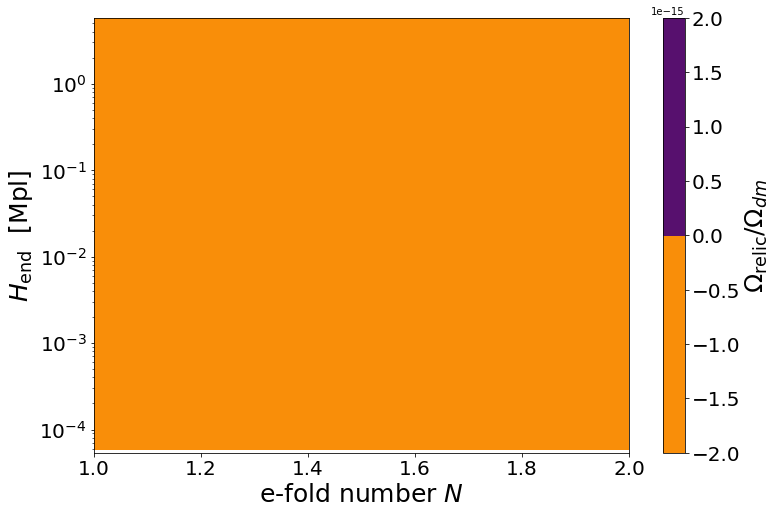

In [334]:
ZEROS = np.zeros(len(H_end_arr)) + rho_osc_arr_GeV.max()**(1./4.)
from matplotlib import ticker, cm

figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

#levels = np.linspace(0,1.0,10)

plt.contourf(e_folds_2D, H_end_2D , Ratio_relic, levels=100, cmap='inferno_r')#,locator=ticker.LogLocator())
#plt.contourf(rho_end_GeV_2D**(1./4.0) ,rho_osc_GeV_2D**(1./4.0) , Ratio_relic, levels=100, cmap='afmhot_r',locator=ticker.LogLocator())

#plt.plot( N_sat, H_sat ,'-', lw=2.0,  color = 'black')

#plt.xscale('log')
plt.yscale('log')


#ax.fill_between( rho_end_arr_GeV**(1./4.0), rho_osc_arr_GeV[rho_end_arr_GeV/rho_osc_arr_GeV>1.0]**(1./4.0), ZEROS, color='grey', alpha=1.0)


plt.xlabel(r'e-fold number $N$',fontsize=25)
plt.ylabel(r'$H_{\rm end} \ \ [\rm Mpl]$',fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.ylim(H_end_arr[0], H_end_arr[-1])
#plt.xlim(1.0,3.0)

cbar = plt.colorbar(ticks=mticker.AutoLocator())
cbar.set_label(r'$\Omega_{\rm relic}/\Omega_{dm} \ \ $' , fontsize=25,)
    
font_size = 20 # Adjust as appropriate.
cbar.ax.tick_params(labelsize=font_size)
 

#plt.savefig('contour.pdf')
plt.show()

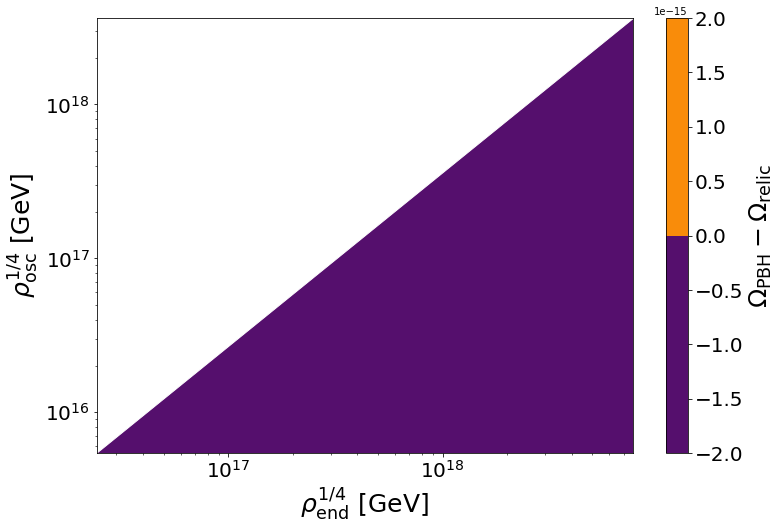

In [335]:
from matplotlib import ticker, cm
import matplotlib.ticker as mticker

figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

#levels = np.linspace(0.0,1.0,100)

plt.contourf( rho_end_GeV_2D**(1./4.0) ,rho_osc_GeV_2D**(1./4.0) , Omega_PBHs - Omega_relics,  levels = 100, cmap='inferno')#,locator=ticker.LogLocator())

ax.fill_between( rho_end_arr_GeV**(1./4.0), rho_osc_arr_GeV**(1./4.0), ZEROS, color='white', alpha=1.0)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$\rho^{1/4}_{\rm end} \ [\rm GeV]$',fontsize=25)
plt.ylabel(r'$\rho^{1/4}_{\rm osc} \ [\rm GeV]$',fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(rho_end_arr_GeV[-1]**(1./4.0), rho_end_arr_GeV[0]**(1./4.0))
plt.ylim(rho_osc_arr_GeV[-1]**(1./4.0), rho_osc_arr_GeV[0]**(1./4.0))

cbar = plt.colorbar(ticks=mticker.AutoLocator())
cbar.set_label(r'$\Omega_{\rm PBH} - \Omega_{\rm relic}\ $' , fontsize=25)
    
font_size = 20 # Adjust as appropriate.
cbar.ax.tick_params(labelsize=font_size)
 

#plt.savefig('contour.pdf')
plt.show()

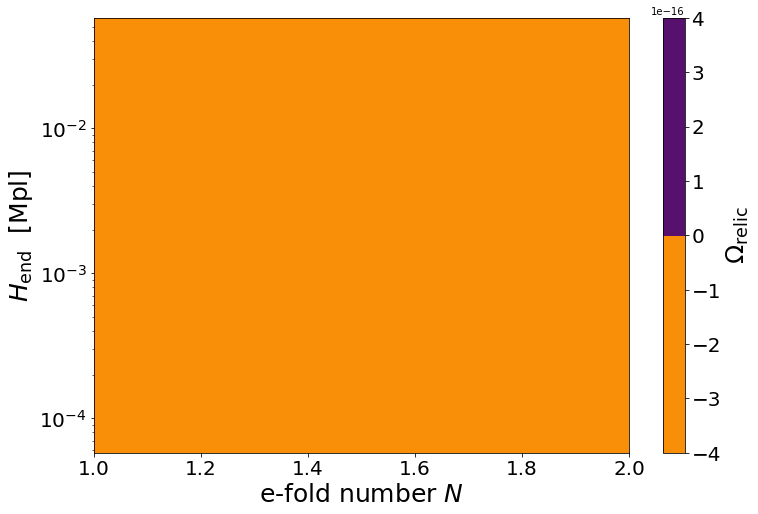

In [295]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

#levels = np.linspace(0.0,1.0,100)

plt.contourf(e_folds_2D ,H_end_2D ,Omega_PBHs - Omega_relics, levels=500, cmap='inferno_r')#,locator=ticker.LogLocator())
#plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'e-fold number $N$',fontsize=25)
plt.ylabel(r'$H_{\rm end} \ \ [\rm Mpl]$',fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


cbar = plt.colorbar(ticks=mticker.AutoLocator())
cbar.set_label(r'$\Omega_{\rm relic}\ \ $' , fontsize=25,)
    
font_size = 20 # Adjust as appropriate.
cbar.ax.tick_params(labelsize=font_size)
 

#plt.savefig('contour.pdf')
plt.show()

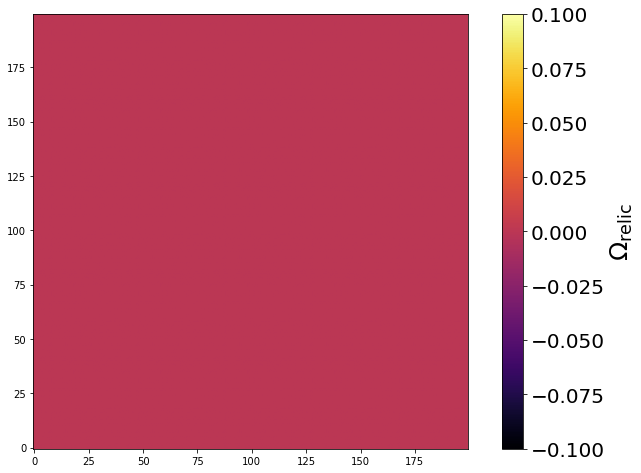

In [296]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

plt.imshow(Omega_relics, origin='lower', cmap=plt.cm.get_cmap("inferno") )   #Muestra una rebanada del cubo

#plt.ylim(10.0**-20,10.0)
#leg1 = plt.legend(loc='upper right', frameon=True,  fontsize = 22, borderpad=0.5, labelspacing=0.5)
#leg1.get_frame().set_edgecolor('black')
#cbar.set_label(r'$\Omega_{\rm PBH}$' , fontsize=25)


cbar = plt.colorbar()
cbar.set_label(r'$\Omega_{\rm relic} \ \ $' , fontsize=25,)
    
font_size = 20 # Adjust as appropriate.
cbar.ax.tick_params(labelsize=font_size)
plt.show()

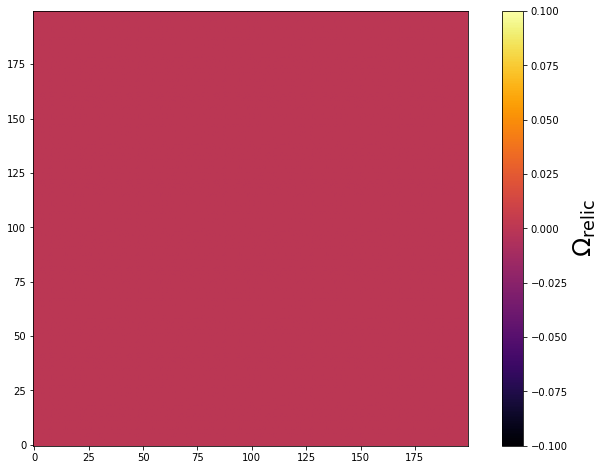

In [297]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

plt.imshow(Omega_PBHs, origin='lower', cmap=plt.cm.get_cmap("inferno") )   #Muestra una rebanada del cubo

#plt.ylim(10.0**-20,10.0)
#leg1 = plt.legend(loc='upper right', frameon=True,  fontsize = 22, borderpad=0.5, labelspacing=0.5)
#leg1.get_frame().set_edgecolor('black')
#cbar.set_label(r'$\Omega_{\rm PBH}$' , fontsize=25)


cbar = plt.colorbar()
cbar.set_label(r'$\Omega_{\rm relic} \ \ $' , fontsize=25,)
    
font_size = 20 # Adjust as appropriate.
#cbar.ax.tick_params(labelsize=font_size)
plt.show()

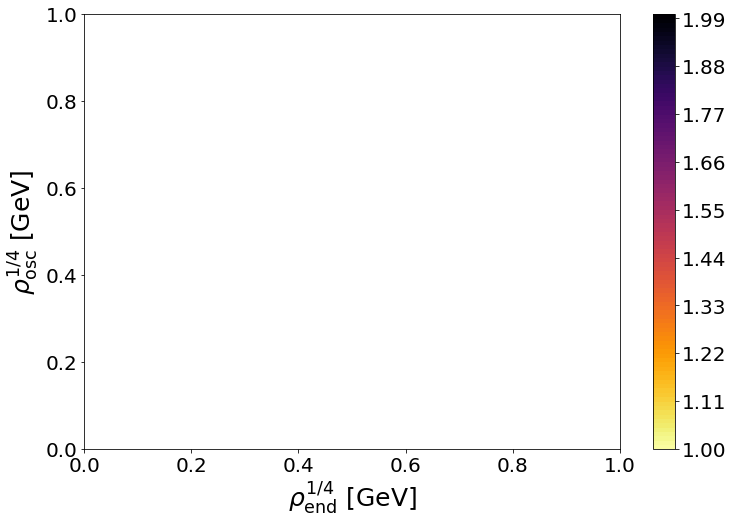

In [267]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

#levels = np.linspace(0.0,1.0,100)

plt.contourf(  Omega_relics, Omega_PBHs , e_folds_2D , levels = 100, cmap='inferno_r')# locator=ticker.LogLocator())
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel(r'$\rho^{1/4}_{\rm end} \ [\rm GeV]$',fontsize=25)
plt.ylabel(r'$\rho^{1/4}_{\rm osc} \ [\rm GeV]$',fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(0,1)
plt.ylim(0,1)
cbar = plt.colorbar()
#cbar.set_label(r'$\Omega_{\rm PBH} - \Omega_{\rm relic}\ $' , fontsize=25)
    
font_size = 20 # Adjust as appropriate.
cbar.ax.tick_params(labelsize=font_size)
 

#plt.savefig('contour.pdf')
plt.show()